In [296]:
import pandas as pd
import re
import datetime

orign_df = pd.read_csv('zillow.csv')

In [297]:
orign_df.head(5)

,title,bds,ba,sqft,time on zillow,veiws,saves,agent,type,parking,buit,lot,history,HOA,schools,neighborhood_home,zillow_prediction,Zillow
0,"436 W 75th St, Los Angeles, CA 90003",3 bds,2 ba,"1,200 sqft",101 days,"1,708",73,Emmanuel Ollawa Prime West Management & Inv.,Single Family,1 space,1922,"1,837 sqft",DATE\tEVENT\tPRICE 11/11/2019\tPrice change\t$...,$0/mo,2/10 Sixty-Eighth Street Elementary School Gra...,South Los Angeles home values have risen 4.6 %...,Zillow predicts the home values in South Los A...,400033
1,"8435 Columbus Ave UNIT 10, Los Angeles, CA 91343",3 bds,3 ba,"1,250 sqft",37 days,"4,665",180,Rene Fuentes Coldwell Banker Quality Properties,Townhouse,Attached Garage,1981,"3,000 sqft",DATE\tEVENT\tPRICE 12/1/2019\tListed for sale\...,$235/mo,4/10 Noble Avenue Elementary School Grades:K-5...,North Hills home values have risen 4.6 % over ...,Zillow predicts the home values in North Hills...,375355
2,"13901 Olive View Ln UNIT 53, Los Angeles, CA 9...",3 bds,3 ba,"1,208 sqft",103 days,"1,301",39,Jennifer Monson Monson Real Estate & Management,Townhouse,No Data,1986,3.32 acres,DATE\tEVENT\tPRICE 1/6/2020\tPrice change\t$38...,$290/mo,6/10 Sylmar Leadership Academy Grades:K-8 Dist...,Sylmar home values have risen 4.6 % over the p...,Zillow predicts the home values in Sylmar will...,385002
3,"7115 Etiwanda Ave UNIT 13, Los Angeles, CA 91335",3 bds,3 ba,"1,297 sqft",94 days,664,17,Karen Komenkul Rodeo Realty,Townhouse,Attached Garage,1981,0.56 acres,DATE\tEVENT\tPRICE 10/6/2019\tListed for sale\...,$370/mo,4/10 Garden Grove Elementary School Grades:K-5...,Reseda home values have risen 4.6 % over the p...,Zillow predicts the home values in Reseda will...,400000
4,"708 E 76th Pl, Los Angeles, CA 90001",2 bds,2 ba,"1,227 sqft",64 days,349,12,,Single Family,Attached Garage,1923,"5,227 sqft",,,3/10 Mckinley Avenue Elementary School Grades:...,Southeast Los Angeles home values have risen 4...,Zillow predicts the home values in Southeast L...,


In [298]:
orign_df["history"][0]

'DATE\tEVENT\tPRICE 11/11/2019\tPrice change\t$399,950(-8.1%)\t 9/29/2019\tListed for sale\t$435,000(+103.3%)\t 10/25/2017\tSold\t$214,000(-34.2%)\t 9/8/2017\tPending sale\t$325,000\t 7/1/2017\tListed for sale\t$325,000(+225.3%)\t 4/6/2011\tSold\t$99,905\t 3/11/2011\tSold\t$99,905\t'

In [299]:
df = orign_df.copy()

In [300]:
df['zipcode'] = df['title'].str[-5:]

In [301]:
# to create neighbor are column
def get_area(row):
    i = row.find("home")
    return row[:i]
df["area"]= df['neighborhood_home'].apply(get_area)

df["area"].value_counts()

Woodland Hills           44
Sylmar                   39
San Pedro                33
Sherman Oaks             26
Downtown Los Angeles     25
                         ..
University Hills          1
Pico-Robertson            1
Bel Air                   1
Harbor Gateway            1
Beverlywood               1
Name: area, Length: 87, dtype: int64

In [302]:
df["prediction"] = df["zillow_prediction"].str.split().str[-6]
df["prediction"].value_counts()

increase    394
rise        375
fall         15
decrease     10
Name: prediction, dtype: int64

In [338]:
df["prediction_rate"] = df["zillow_prediction"].str.split().str[-5]
df.drop("zillow_prediction", axis = 1, inplace = True)
df["prediction_rate"].value_counts()


2.1%     58
2.2%     57
2%       45
1.4%     41
7%       35
1.7%     28
2.3%     28
0.6%     26
0.2%     25
4.2%     24
3%       24
4.4%     24
8.3%     22
3.5%     20
4%       18
5.3%     18
5.9%     16
1.5%     16
3.4%     15
9.3%     15
6.8%     14
2.4%     13
5.8%     13
6.2%     13
2.9%     13
5.7%     13
3.6%     12
8.4%     11
1.9%     11
1.3%     10
7.5%     10
4.5%      9
7.1%      8
1.8%      8
12.5%     7
4.6%      7
0.1%      7
1.6%      6
6.6%      6
4.9%      5
8.9%      5
5.1%      5
6.1%      4
0.8%      4
5.5%      4
3.1%      3
8%        3
1.2%      3
8.2%      2
3.3%      2
8.5%      2
6%        2
5.4%      2
6.3%      1
9.8%      1
Name: prediction_rate, dtype: int64

In [339]:
def combine_prediction(row):
    if row == 'rise':
        return "increase"
    elif row == "fall":
        return "decrease"
    else:
        return row

In [340]:
df["prediction_combined"] = df["prediction"].apply(combine_prediction) 
df["prediction_combined"].value_counts()

increase    769
decrease     25
Name: prediction_combined, dtype: int64

In [341]:
def school_list(row):
    school_list =[]
    for i, v in enumerate(row.split(':')[::2][:3]):
        ind = v.find('/')
        if i == 0:
            result = [v[:ind], v[ind+3:]]
        else:
            if len(v) > 6:
                result = [v[ind-1], v[ind+3:]]
            else:
                result = 'None'
        school_list.append(result)
    return school_list

In [342]:
df["school_list"] = df["schools"].apply(school_list) 
df["school_list"]

0      [[2,  Sixty-Eighth Street Elementary School Gr...
1      [[4,  Noble Avenue Elementary School Grades], ...
2      [[6,  Sylmar Leadership Academy Grades], [4,  ...
3      [[4,  Garden Grove Elementary School Grades], ...
4      [[3,  Mckinley Avenue Elementary School Grades...
                             ...                        
800    [[3,  Tenth Street Elementary School Grades], ...
801    [[8,  Clifford Street Elementary School Grades...
802    [[8,  Lockhurst Drive Charter Elementary Grade...
803    [[2,  Bushnell Way Elementary School Grades], ...
804    [[2,  Alta Loma Elementary School Grades], [2,...
Name: school_list, Length: 805, dtype: object

In [343]:
def history_convert(row):
    clean_row = row[17:-1].split('\t')
    history_status = [v.strip() for v in clean_row[1::3]]
    history_date = []
    for v in clean_row[::3]:
        if v != '':
            result = datetime.datetime.strptime(v.strip(), '%m/%d/%Y')
            history_date.append(result.date())
        
    history_price = []
    for v in clean_row[2::3]:
        ind = v.find("(")
        if ind > 0:
            result = v[:ind].replace("$", "").replace(",","")
        else:
            result = v.replace("$","").replace(",","")
        history_price.append(float(result))
    
    return (history_date, history_status, history_price)

In [344]:
df["history_date"] = df["history"].apply(lambda row:history_convert(row)[0])
df["history_status"] = df["history"].apply(lambda row:history_convert(row)[1])
df["history_price"]= df["history"].apply(lambda row:history_convert(row)[2])



In [345]:
df["history_date"] 

0      [2019-11-11, 2019-09-29, 2017-10-25, 2017-09-0...
1                   [2019-12-01, 1995-02-15, 1994-07-21]
2                               [2020-01-06, 2019-09-26]
3      [2019-10-06, 2010-07-28, 2003-03-12, 2001-07-0...
4                                                     []
                             ...                        
800    [2019-12-10, 2019-11-23, 2019-09-26, 2014-04-0...
801                 [2019-12-18, 2019-12-05, 2016-01-28]
802    [2019-11-19, 2019-10-30, 2019-03-29, 2018-11-2...
803    [2019-10-16, 2019-10-10, 2019-09-08, 2018-11-1...
804                                                   []
Name: history_date, Length: 805, dtype: object

In [346]:
df["history_status"]

0      [Price change, Listed for sale, Sold, Pending ...
1                          [Listed for sale, Sold, Sold]
2                        [Price change, Listed for sale]
3      [Listed for sale, Sold, Sold, Sold, Sold, Sold...
4                                                     []
                             ...                        
800    [Price change, Price change, Listed for sale, ...
801                [Price change, Listed for sale, Sold]
802    [Price change, Listed for sale, Sold, Sold, Ba...
803    [Back on market, Pending sale, Listed for sale...
804                                                   []
Name: history_status, Length: 805, dtype: object

In [347]:
df["history_price"]

0      [399950.0, 435000.0, 214000.0, 325000.0, 32500...
1                           [370000.0, 80000.0, 66745.0]
2                                   [385000.0, 400000.0]
3      [399999.0, 210000.0, 188000.0, 123000.0, 75000...
4                                                     []
                             ...                        
800    [449000.0, 459000.0, 469000.0, 1800.0, 1800.0,...
801                       [849500.0, 895000.0, 729000.0]
802    [1249999.0, 1277777.0, 733500.0, 688000.0, 747...
803    [499000.0, 499000.0, 499000.0, 488000.0, 48800...
804                                                   []
Name: history_price, Length: 805, dtype: object

In [348]:
new_df = df.copy()

In [349]:
new_df = new_df.drop(["history","schools","neighborhood_home"], axis = 1)
print(new_df.shape)
new_df.head(5)

(805, 23)


,title,bds,ba,sqft,time on zillow,veiws,saves,agent,type,parking,...,Zillow,zipcode,area,prediction,prediction_combined,school_list,history_date,history_status,history_price,prediction_rate
0,"436 W 75th St, Los Angeles, CA 90003",3 bds,2 ba,"1,200 sqft",101 days,"1,708",73,Emmanuel Ollawa Prime West Management & Inv.,Single Family,1 space,...,400033,90003,South Los Angeles,increase,increase,"[[2, Sixty-Eighth Street Elementary School Gr...","[2019-11-11, 2019-09-29, 2017-10-25, 2017-09-0...","[Price change, Listed for sale, Sold, Pending ...","[399950.0, 435000.0, 214000.0, 325000.0, 32500...",4.4%
1,"8435 Columbus Ave UNIT 10, Los Angeles, CA 91343",3 bds,3 ba,"1,250 sqft",37 days,"4,665",180,Rene Fuentes Coldwell Banker Quality Properties,Townhouse,Attached Garage,...,375355,91343,North Hills,increase,increase,"[[4, Noble Avenue Elementary School Grades], ...","[2019-12-01, 1995-02-15, 1994-07-21]","[Listed for sale, Sold, Sold]","[370000.0, 80000.0, 66745.0]",2.3%
2,"13901 Olive View Ln UNIT 53, Los Angeles, CA 9...",3 bds,3 ba,"1,208 sqft",103 days,"1,301",39,Jennifer Monson Monson Real Estate & Management,Townhouse,No Data,...,385002,91342,Sylmar,rise,increase,"[[6, Sylmar Leadership Academy Grades], [4, ...","[2020-01-06, 2019-09-26]","[Price change, Listed for sale]","[385000.0, 400000.0]",2.2%
3,"7115 Etiwanda Ave UNIT 13, Los Angeles, CA 91335",3 bds,3 ba,"1,297 sqft",94 days,664,17,Karen Komenkul Rodeo Realty,Townhouse,Attached Garage,...,400000,91335,Reseda,increase,increase,"[[4, Garden Grove Elementary School Grades], ...","[2019-10-06, 2010-07-28, 2003-03-12, 2001-07-0...","[Listed for sale, Sold, Sold, Sold, Sold, Sold...","[399999.0, 210000.0, 188000.0, 123000.0, 75000...",1.5%
4,"708 E 76th Pl, Los Angeles, CA 90001",2 bds,2 ba,"1,227 sqft",64 days,349,12,,Single Family,Attached Garage,...,,90001,Southeast Los Angeles,increase,increase,"[[3, Mckinley Avenue Elementary School Grades...",[],[],[],5.8%


In [350]:
# after excluding the studio, and lot records and then convert the rest of records from string to float data type 
new_df = new_df[(new_df["bds"] != "Studio") & (new_df["bds"].str.split().str[-1] != 'lot')]
new_df["bds"] = new_df["bds"].str.split().str[0].astype('int')
print(new_df.shape)
new_df["bds"].unique()


(773, 23)


array([3, 2, 4, 1, 6, 5, 7, 8])

In [351]:
# same as the baths
new_df = new_df[new_df["ba"] !='#NAME?']
new_df["ba"] = new_df["ba"].str.split().str[0].astype('float')
print(new_df.shape)
new_df["ba"].unique()



(770, 23)


array([2. , 3. , 1. , 4. , 5. , 6. , 2.5, 7. , 1.5])

In [352]:
new_df["sqft"].value_counts(ascending = True)

2,353 sqft     1
1,362 sqft     1
1,303 sqft     1
3,655 sqft     1
1,795 sqft     1
              ..
1 bd          16
5 bds         16
4 bds         35
2 bds         72
3 bds         82
Name: sqft, Length: 451, dtype: int64

In [353]:
# finding weird data of sqft column
def convert_sqft(row):
    result = row.split(" ")
    if result[-1] == 'sqft':
        return float(result[0].replace(",",""))
    else:
        return 0


In [354]:
new_df["sqft_num"] = new_df["sqft"].apply(convert_sqft)
new_df["sqft_num"].value_counts()

0.0       231
1390.0      4
1250.0      4
1800.0      4
1200.0      4
         ... 
570.0       1
2054.0      1
2154.0      1
1951.0      1
1255.0      1
Name: sqft_num, Length: 444, dtype: int64

In [355]:
new_df["time on zillow"] = new_df["time on zillow"].str[:-4]

In [356]:
new_df["prediction_rate"] = new_df["prediction_rate"].str.replace("%","").astype('float')

In [357]:
import numpy as np
new_df["time on zillow"] = pd.to_numeric(new_df["time on zillow"], errors='coerce').fillna(0).astype(np.int64)
new_df["veiws"] = pd.to_numeric(new_df["veiws"], errors='coerce').fillna(0).astype(np.int64)
new_df["saves"] = pd.to_numeric(new_df["saves"], errors='coerce').fillna(0).astype(np.int64)
new_df["Zillow"] = pd.to_numeric(new_df["Zillow"], errors='coerce').fillna(0).astype(np.int64)

In [358]:
new_df.head(5)

,title,bds,ba,sqft,time on zillow,veiws,saves,agent,type,parking,...,zipcode,area,prediction,prediction_combined,school_list,history_date,history_status,history_price,prediction_rate,sqft_num
0,"436 W 75th St, Los Angeles, CA 90003",3,2.0,"1,200 sqft",101,0,73,Emmanuel Ollawa Prime West Management & Inv.,Single Family,1 space,...,90003,South Los Angeles,increase,increase,"[[2, Sixty-Eighth Street Elementary School Gr...","[2019-11-11, 2019-09-29, 2017-10-25, 2017-09-0...","[Price change, Listed for sale, Sold, Pending ...","[399950.0, 435000.0, 214000.0, 325000.0, 32500...",4.4,1200.0
1,"8435 Columbus Ave UNIT 10, Los Angeles, CA 91343",3,3.0,"1,250 sqft",37,0,180,Rene Fuentes Coldwell Banker Quality Properties,Townhouse,Attached Garage,...,91343,North Hills,increase,increase,"[[4, Noble Avenue Elementary School Grades], ...","[2019-12-01, 1995-02-15, 1994-07-21]","[Listed for sale, Sold, Sold]","[370000.0, 80000.0, 66745.0]",2.3,1250.0
2,"13901 Olive View Ln UNIT 53, Los Angeles, CA 9...",3,3.0,"1,208 sqft",103,0,39,Jennifer Monson Monson Real Estate & Management,Townhouse,No Data,...,91342,Sylmar,rise,increase,"[[6, Sylmar Leadership Academy Grades], [4, ...","[2020-01-06, 2019-09-26]","[Price change, Listed for sale]","[385000.0, 400000.0]",2.2,1208.0
3,"7115 Etiwanda Ave UNIT 13, Los Angeles, CA 91335",3,3.0,"1,297 sqft",94,664,17,Karen Komenkul Rodeo Realty,Townhouse,Attached Garage,...,91335,Reseda,increase,increase,"[[4, Garden Grove Elementary School Grades], ...","[2019-10-06, 2010-07-28, 2003-03-12, 2001-07-0...","[Listed for sale, Sold, Sold, Sold, Sold, Sold...","[399999.0, 210000.0, 188000.0, 123000.0, 75000...",1.5,1297.0
4,"708 E 76th Pl, Los Angeles, CA 90001",2,2.0,"1,227 sqft",64,349,12,,Single Family,Attached Garage,...,90001,Southeast Los Angeles,increase,increase,"[[3, Mckinley Avenue Elementary School Grades...",[],[],[],5.8,1227.0


In [359]:
new_df.describe()

,bds,ba,time on zillow,veiws,saves,Zillow,prediction_rate,sqft_num
count,770.000000,770.000000,770.000000,770.000000,770.000000,7.700000e+02,760.000000,770.000000
mean,2.915584,2.474675,74.631169,91.616883,76.684416,6.591099e+05,3.674474,1070.232468
std,1.133204,1.026474,93.815712,236.599347,77.558504,2.946253e+05,2.455025,1036.101008
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.100000,0.000000
25%,2.000000,2.000000,12.000000,0.000000,30.000000,4.592265e+05,2.000000,0.000000
50%,3.000000,2.000000,50.000000,0.000000,54.000000,6.535345e+05,2.900000,1140.000000
75%,3.000000,3.000000,100.000000,0.000000,96.000000,8.465390e+05,5.425000,1618.000000
max,8.000000,7.000000,1213.000000,996.000000,730.000000,1.810247e+06,12.500000,17400.000000


In [360]:
data = new_df.copy()

In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 804
Data columns (total 24 columns):
title                  770 non-null object
bds                    770 non-null int64
ba                     770 non-null float64
sqft                   770 non-null object
time on zillow         770 non-null int64
veiws                  770 non-null int64
saves                  770 non-null int64
agent                  770 non-null object
type                   770 non-null object
parking                770 non-null object
buit                   770 non-null object
lot                    770 non-null object
HOA                    770 non-null object
Zillow                 770 non-null int64
zipcode                770 non-null object
area                   770 non-null object
prediction             760 non-null object
prediction_combined    760 non-null object
school_list            770 non-null object
history_date           770 non-null object
history_status         770 non-null obj

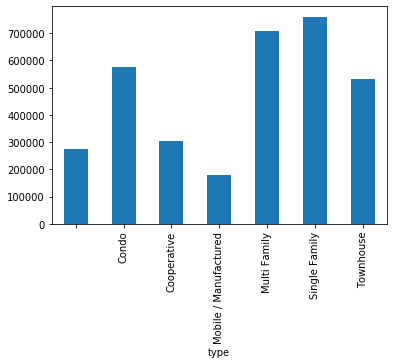

In [362]:
import matplotlib.pyplot as plt
%matplotlib inline
data.groupby('type').Zillow.mean().plot.bar()


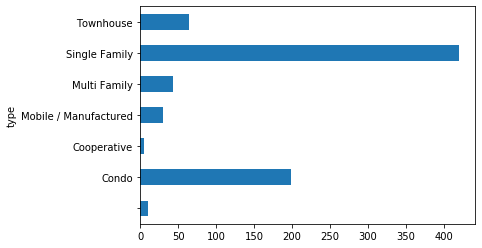

In [363]:
data.groupby('type')["title"].count().plot.barh()

In [364]:
top_10_list_area = (data.area.value_counts(ascending = False).index)[:10]
print(top_10_list_area)

Index(['Woodland Hills ', 'Sylmar ', 'San Pedro ', 'Sherman Oaks ',
       'Van Nuys ', 'South Los Angeles ', 'Northridge ',
       'Downtown Los Angeles ', 'Highland Park ', 'Hollywood Hills '],
      dtype='object')


In [365]:
# selecting rows based on condition 
top_10_df = data[data['area'].isin(top_10_list_area)] 

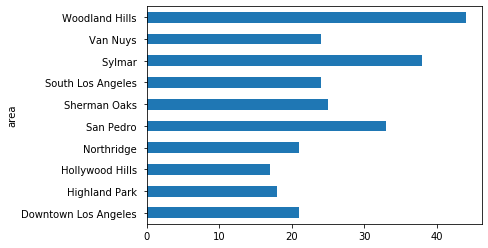

In [366]:
top_10_df.groupby("area")["title"].count().plot.barh()

In [367]:
top_10_g_p = top_10_df.groupby(["area","prediction_combined"]).prediction_rate.max()
top_10_g_p

area                   prediction_combined
Downtown Los Angeles   decrease               0.2
Highland Park          increase               2.2
Hollywood Hills        increase               8.3
Northridge             increase               2.1
San Pedro              increase               2.1
Sherman Oaks           increase               7.0
South Los Angeles      increase               4.4
Sylmar                 increase               2.2
Van Nuys               increase               3.0
Woodland Hills         increase               2.0
Name: prediction_rate, dtype: float64

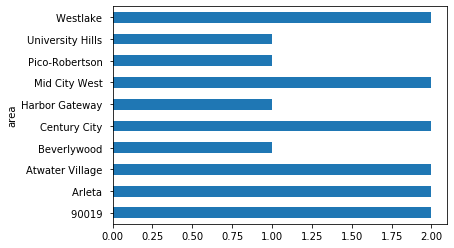

In [368]:
bottom_10_list_area = (data.area.value_counts(ascending = False).index)[-10:]
bottom_10_df = data[data['area'].isin(bottom_10_list_area)]
bottom_10_df.groupby("area")["title"].count().plot.barh()

In [369]:
bottom_10_df.groupby(["area","prediction_combined"]).prediction_rate.max().sort_values(ascending = False)

area               prediction_combined
Beverlywood        increase               9.8
Mid City West      increase               8.5
Pico-Robertson     increase               6.3
90019              increase               5.8
Century City       increase               5.4
Westlake           increase               5.1
University Hills   increase               4.2
Atwater Village    increase               3.3
Harbor Gateway     increase               2.0
Arleta             increase               1.7
Name: prediction_rate, dtype: float64

In [370]:
increase_df = data[data["prediction_combined"] == "increase"]
avg_increase = increase_df["prediction_rate"].mean()
avg_increase

3.7732070365358577

In [371]:
decrease_df = data[data["prediction_combined"] == "decrease"]
avg_decrease = decrease_df["prediction_rate"].mean()
avg_decrease

0.20000000000000004

In [372]:
decrease_df["area"].unique()

array(['Downtown Los Angeles '], dtype=object)

In [373]:
school_df = data[["title", "area","Zillow","school_list"]]

In [374]:
school_df["first_school_grade"] = school_df["school_list"].str[0].str[0]
school_df["first_school"] = school_df["school_list"].str[0].str[1]
school_df["second_school_grade"] = school_df["school_list"].str[1].str[0]
school_df["second_school"] = school_df["school_list"].str[1].str[1]
school_df["third_school_grade"] = school_df["school_list"].str[2].str[0]
school_df["third_school"] = school_df["school_list"].str[2].str[1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [375]:
school_df.groupby("first_school").agg({'first_school_grade':'max', 'Zillow':'mean'}).sort_values('first_school_grade', ascending = False)

,first_school_grade,Zillow
first_school,,
schools nearby We couldn't find any schools near this home.,No schools nearby We couldn't find any schools...,6.816671e+05
Washington Primary Center School Grades,NA Washington Primary Center School Grade,5.094920e+05
Richard Riordan Primary Center Grades,NA Richard Riordan Primary Center Grade,1.150006e+06
Maxine Waters Employment Prep Center Grades,NA Maxine Waters Employment Prep Center Grade,4.404610e+05
"Danny J. Bakewell, Sr., Primary Center Grades","NA Danny J. Bakewell, Sr., Primary Center Grade",3.134275e+05
...,...,...
Fifty-Ninth Street Elementary School Grades,1,5.267135e+05
La Salle Avenue Elementary School Grades,1,6.348897e+05
Western Avenue Elementary School Grades,1,5.990050e+05


In [376]:
school_df["first_school_grade"].value_counts()

4                                                                126
8                                                                105
5                                                                101
2                                                                100
3                                                                 90
6                                                                 64
7                                                                 62
9                                                                 48
1                                                                 28
10                                                                23
                                                                  10
No schools nearby We couldn't find any schools near this home      7
NA Danny J. Bakewell, Sr., Primary Center Grade                    2
NA Washington Primary Center School Grade                          2
NA Richard Riordan Primary Center 